In [1]:
import pandas as pd
import numpy as np
import pickle

pd.options.display.max_columns = 100
pd.options.display.max_rows = 1500

In [2]:
df = pd.read_excel('C:/Users/Anastasiya.Mittseva/PycharmProjects/ProjectPredictSolidity/входные данные/prepared_data.xlsx')
df.head()

,Сталь,С,Mn,Si,S,P,Cr,Ni,Cu,Mo,V,Nb,Ti,Al,N,O,B,Сэкв,Тнагрева,"время выдержки, мин",параметр закалки,Ас1,Ас3,V800-500 °C/c,%Ф,%П,%Б,%М,%А остаточный,HV,HB,HRC,HRB
0,32г2,0.32,1.1,0.27,0.02,0.017,0.23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.549333,850.0,10,810.626512,735.0,795.0,0.11,NaN,NaN,NaN,NaN,NaN,180.0,NaN,NaN,NaN
1,32г2,0.32,1.1,0.27,0.02,0.017,0.23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.549333,850.0,10,810.626512,735.0,795.0,0.31,NaN,NaN,NaN,NaN,NaN,180.0,NaN,NaN,NaN
2,32г2,0.32,1.1,0.27,0.02,0.017,0.23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.549333,850.0,10,810.626512,735.0,795.0,1.00,NaN,NaN,NaN,NaN,NaN,180.0,NaN,NaN,NaN
3,32г2,0.32,1.1,0.27,0.02,0.017,0.23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.549333,850.0,10,810.626512,735.0,795.0,3.40,NaN,NaN,NaN,NaN,NaN,195.0,NaN,NaN,NaN
4,32г2,0.32,1.1,0.27,0.02,0.017,0.23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.549333,850.0,10,810.626512,735.0,795.0,7.00,NaN,NaN,NaN,NaN,NaN,200.0,NaN,NaN,NaN


In [3]:
def convertHRCtoHV(x):
    y = 0.0001076546813696400 * x ** 4 - 0.01404920211793480 * x ** 3 + 0.7989548243359580 * x ** 2 - 13.82475417563670 * x + 289.8692821768870
    return y

def repl(x):
    if np.isnan(x):
        return round(convertHRCtoHV(df['HRC'].loc[x.index]),2)
    else:
        return x

df['HRC'] = df['HRC'].map(convertHRCtoHV)

df['HV'] = df['HV'].combine_first(df['HRC'])

columns = ['HRC', 'HB', 'HRB']
df = df.drop(columns,1)

df = df.fillna(0)

df = df[~(df['HV'] == 0.0)]

df = df.drop(df[df['%А остаточный'] != 0].index)

df = df.drop('%А остаточный',1)

df = df[~(df['V800-500 °C/c']== 0.0)]

df = df[~(df['Тнагрева']== 0.0)]

df

,Сталь,С,Mn,Si,S,P,Cr,Ni,Cu,Mo,V,Nb,Ti,Al,N,O,B,Сэкв,Тнагрева,"время выдержки, мин",параметр закалки,Ас1,Ас3,V800-500 °C/c,%Ф,%П,%Б,%М,HV
0,32г2,0.320,1.100,0.27,0.0200,0.0170,0.23,0.00,0.000,0.000,0.000,0.000,0.0000,0.000,0.0000,0.0000,0.0000,0.549333,850.0,10,810.626512,735.0,795.0,0.11000,0.0,0.0,0.0,0.0,180.000000
1,32г2,0.320,1.100,0.27,0.0200,0.0170,0.23,0.00,0.000,0.000,0.000,0.000,0.0000,0.000,0.0000,0.0000,0.0000,0.549333,850.0,10,810.626512,735.0,795.0,0.31000,0.0,0.0,0.0,0.0,180.000000
2,32г2,0.320,1.100,0.27,0.0200,0.0170,0.23,0.00,0.000,0.000,0.000,0.000,0.0000,0.000,0.0000,0.0000,0.0000,0.549333,850.0,10,810.626512,735.0,795.0,1.00000,0.0,0.0,0.0,0.0,180.000000
3,32г2,0.320,1.100,0.27,0.0200,0.0170,0.23,0.00,0.000,0.000,0.000,0.000,0.0000,0.000,0.0000,0.0000,0.0000,0.549333,850.0,10,810.626512,735.0,795.0,3.40000,0.0,0.0,0.0,0.0,195.000000
4,32г2,0.320,1.100,0.27,0.0200,0.0170,0.23,0.00,0.000,0.000,0.000,0.000,0.0000,0.000,0.0000,0.0000,0.0000,0.549333,850.0,10,810.626512,735.0,795.0,7.00000,0.0,0.0,0.0,0.0,200.000000
5,32г2,0.320,1.100,0.27,0.0200,0.0170,0.23,0.00,0.000,0.000,0.000,0.000,0.0000,0.000,0.0000,0.0000,0.0000,0.549333,850.0,10,810.626512,735.0,795.0,12.00000,0.0,0.0,0.0,0.0,260.000000
6,32г2,0.320,1.100,0.27,0.0200,0.0170,0.23,0.00,0.000,0.000,0.000,0.000,0.0000,0.000,0.0000,0.0000,0.0000,0.549333,850.0,10,810.626512,735.0,795.0,18.00000,0.0,0.0,0.0,0.0,330.000000
7,32г2,0.320,1.100,0.27,0.0200,0.0170,0.23,0.00,0.000,0.000,0.000,0.000,0.0000,0.000,0.0000,0.0000,0.0000,0.549333,850.0,10,810.626512,735.0,795.0,39.00000,0.0,0.0,0.0,0.0,480.000000
8,32г2,0.320,1.100,0.27,0.0200,0.0170,0.23,0.00,0.000,0.000,0.000,0.000,0.0000,0.000,0.0000,0.0000,0.0000,0.549333,850.0,10,810.626512,735.0,795.0,69.00000,0.0,0.0,0.0,0.0,510.000000
9,32г2,0.320,1.100,0.27,0.0200,0.0170,0.23,0.00,0.000,0.000,0.000,0.000,0.0000,0.000,0.0000,0.0000,0.0000,0.549333,850.0,10,810.626512,735.0,795.0,183.00000,0.0,0.0,0.0,0.0,520.000000


In [4]:
df = df.reset_index()

df = df.drop('index',1)

df.head()

,Сталь,С,Mn,Si,S,P,Cr,Ni,Cu,Mo,V,Nb,Ti,Al,N,O,B,Сэкв,Тнагрева,"время выдержки, мин",параметр закалки,Ас1,Ас3,V800-500 °C/c,%Ф,%П,%Б,%М,HV
0,32г2,0.32,1.1,0.27,0.02,0.017,0.23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.549333,850.0,10,810.626512,735.0,795.0,0.11,0.0,0.0,0.0,0.0,180.0
1,32г2,0.32,1.1,0.27,0.02,0.017,0.23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.549333,850.0,10,810.626512,735.0,795.0,0.31,0.0,0.0,0.0,0.0,180.0
2,32г2,0.32,1.1,0.27,0.02,0.017,0.23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.549333,850.0,10,810.626512,735.0,795.0,1.00,0.0,0.0,0.0,0.0,180.0
3,32г2,0.32,1.1,0.27,0.02,0.017,0.23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.549333,850.0,10,810.626512,735.0,795.0,3.40,0.0,0.0,0.0,0.0,195.0
4,32г2,0.32,1.1,0.27,0.02,0.017,0.23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.549333,850.0,10,810.626512,735.0,795.0,7.00,0.0,0.0,0.0,0.0,200.0


## train_test_split

In [6]:
from sklearn.model_selection import  train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn import model_selection
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, matthews_corrcoef, median_absolute_error

ls_train_col = ['С', 'Mn', 'Si', 'S', 'P', 'Cr', 'Ni', 'Cu', 'Mo', 'V', 'Nb', 'Ti', 'Al', 'N','O','B', 'Сэкв','параметр закалки','V800-500 °C/c']
targets = ['HV']

x_input = df[ls_train_col]
y_input = df[targets]

n_trees = 128
learning_rate = 0.1
max_depth = 3

x, x_valid, y, y_valid = train_test_split(x_input, y_input, test_size=0.3)

gbr = GradientBoostingRegressor(n_estimators=n_trees, learning_rate=learning_rate, max_depth=max_depth)

def print_and_return_score(x, y, est):
    y_pred = est.predict(x)
    scr = est.score(x, y)
    mae = mean_absolute_error(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    corr = np.corrcoef(y.iloc[:].T, y_pred[:])
        
    print('Score: ', round(scr, 2))
    print('R^2: ', round(r2, 2))
    print('MAE: ', round(mae, 2))
    print('MSE: ', round(mse, 2))
    print('Correlation ', round(corr[0][1], 2))
    
    return [scr,r2, mae, mse, corr[0][1]]

In [8]:
x_train,  x_test,  y_train,  y_test  =  train_test_split (x, y, test_size=0.3)

gbr.fit(x_train, y_train)

test_scr, test_r2, test_mae, test_mse, test_corr = print_and_return_score(x_test, y_test, gbr)

Score:  0.9
R^2:  0.9
MAE:  32.01
MSE:  2307.51
Correlation  0.95


C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [10]:
valid_scr, valid_r2, valid_mae, valid_mse, valid_corr = print_and_return_score(x_valid, y_valid, gbr)

Score:  0.91
R^2:  0.91
MAE:  27.57
MSE:  1690.3
Correlation  0.96


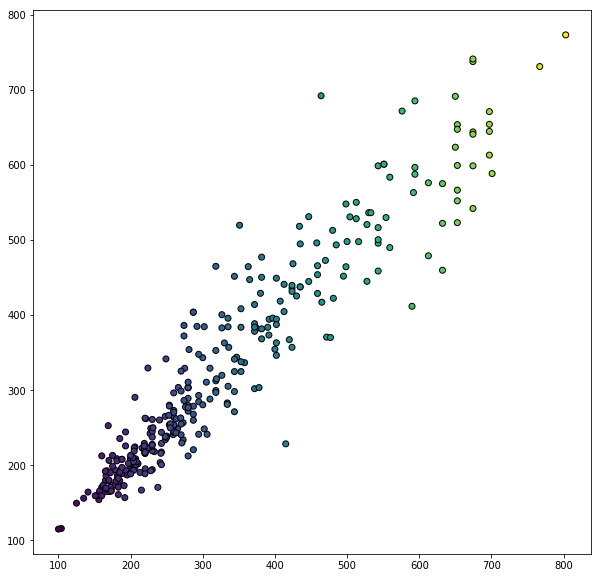

In [13]:
import  seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

y_predict_test = gbr.predict(x_test)

plt.subplots(figsize=(10,10))
plt.scatter(y_test, y_predict_test, marker='o', c=y_test, edgecolors='black', cmap='viridis')
plt.show()

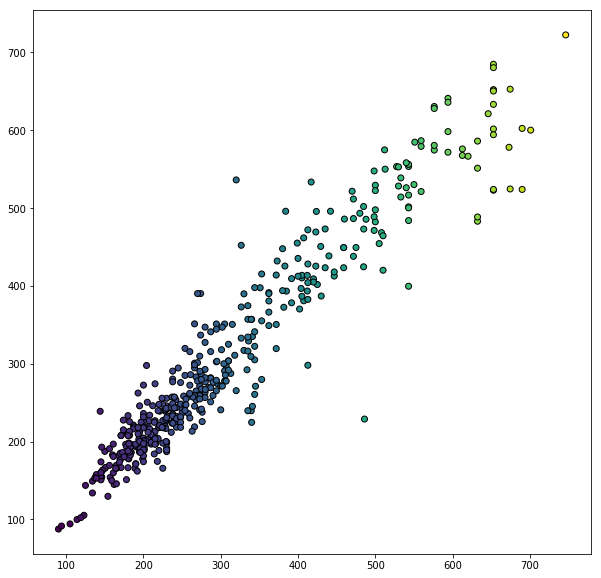

In [15]:
y_predict_valid = gbr.predict(x_valid)

plt.subplots(figsize=(10,10))
plt.scatter(y_valid, y_predict_valid, marker='o', c=y_valid, edgecolors='black', cmap='viridis')
plt.show()

## KFold 

In [16]:
from sklearn.model_selection import  train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn import model_selection
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, matthews_corrcoef, median_absolute_error

ls_train_col = ['С', 'Mn', 'Si', 'S', 'P', 'Cr', 'Ni', 'Cu', 'Mo', 'V', 'Nb', 'Ti', 'Al', 'N','O','B', 'Сэкв','параметр закалки','V800-500 °C/c']
targets = ['HV']

x_input = df[ls_train_col]
y_input = df[targets]

n_trees = 128
learning_rate = 0.1
max_depth = 3

x, x_valid, y, y_valid = train_test_split(x_input, y_input, test_size=0.3)

gbr = GradientBoostingRegressor(n_estimators=n_trees, learning_rate=learning_rate, max_depth=max_depth)

def print_and_return_score(x, y, est):
    y_pred = est.predict(x)
    scr = est.score(x, y)
    mae = mean_absolute_error(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    corr = np.corrcoef(y.iloc[:].T, y_pred[:])
        
    print('Score: ', round(scr, 2))
    print('R^2: ', round(r2, 2))
    print('MAE: ', round(mae, 2))
    print('MSE: ', round(mse, 2))
    print('Correlation ', round(corr[0][1], 2))
    
    return [scr,r2, mae, mse, corr[0][1]]

In [17]:
kfold = model_selection.KFold(n_splits=5, shuffle=True)
scores = []
for train, test in kfold.split(x, y):
    x_train, y_train = x.iloc[train], y.iloc[train]
    x_test, y_test = x.iloc[test], y.iloc[test]
    gbr.fit(x_train, y_train)
    
    scores.append(print_and_return_score(x_test, y_test, gbr))

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Score:  0.88
R^2:  0.88
MAE:  33.5
MSE:  2677.72
Correlation  0.94
Score:  0.89
R^2:  0.89
MAE:  30.04
MSE:  2013.94
Correlation  0.95


C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Score:  0.93
R^2:  0.93
MAE:  29.71
MSE:  1639.55
Correlation  0.97
Score:  0.87
R^2:  0.87
MAE:  33.25
MSE:  2609.73
Correlation  0.93
Score:  0.9
R^2:  0.9
MAE:  31.64
MSE:  2252.85
Correlation  0.95


C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [18]:
listScore = []
for i in range(5):
    tmp = []
    for j in range(5):
        tmp.append(scores[j][i])
    listScore.append(round(np.mean(tmp), 2))
    print(round(np.mean(tmp), 2))

0.89
0.89
31.63
2238.76
0.95


In [20]:
valid_scr, valid_r2, valid_mae, valid_mse, valid_corr = print_and_return_score(x_valid, y_valid, gbr)

Score:  0.9
R^2:  0.9
MAE:  29.87
MSE:  1796.07
Correlation  0.95


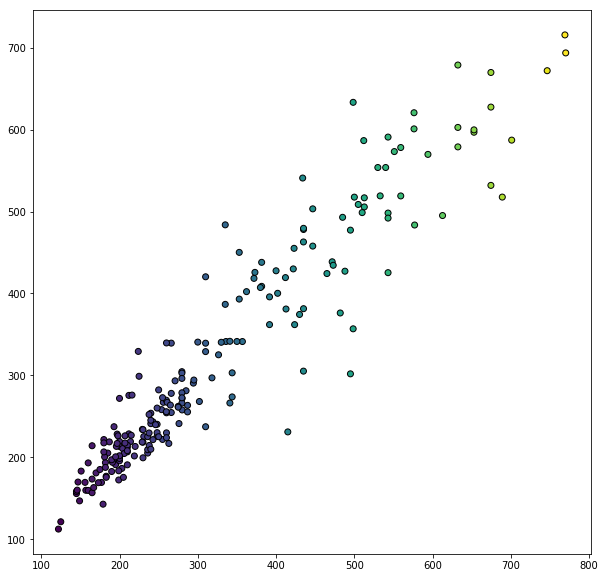

In [22]:
import  seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

y_predict_test = gbr.predict(x_test)

plt.subplots(figsize=(10,10))
plt.scatter(y_test, y_predict_test, marker='o', c=y_test, edgecolors='black', cmap='viridis')
plt.show()

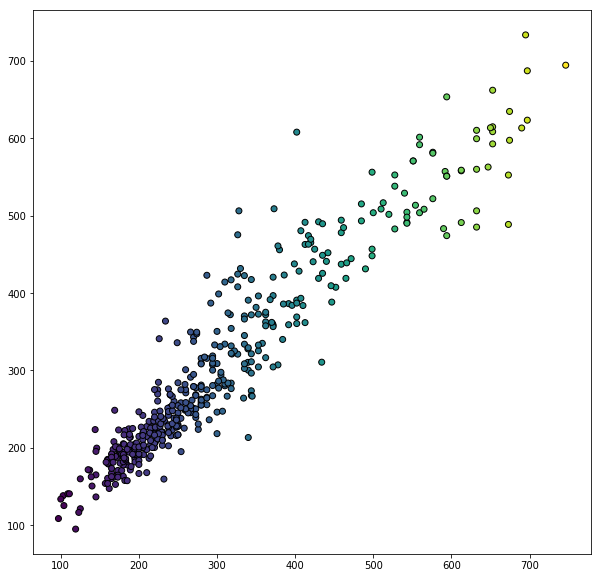

In [23]:
y_predict_valid = gbr.predict(x_valid)

plt.subplots(figsize=(10,10))
plt.scatter(y_valid, y_predict_valid, marker='o', c=y_valid, edgecolors='black', cmap='viridis')
plt.show()

## GridSearchCV 

In [24]:
from sklearn.model_selection import  train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn import model_selection
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, matthews_corrcoef, median_absolute_error

ls_train_col = ['С', 'Mn', 'Si', 'S', 'P', 'Cr', 'Ni', 'Cu', 'Mo', 'V', 'Nb', 'Ti', 'Al', 'N','O', 'B', 'Сэкв','параметр закалки','V800-500 °C/c']
targets = ['HV']

x_input = df[ls_train_col]
y_input = df[targets]

x, x_valid, y, y_valid = train_test_split(x_input, y_input, test_size=0.3)

def print_and_return_score(x, y, est):
    y_pred = est.predict(x)
    scr = est.score(x, y)
    mae = mean_absolute_error(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    corr = np.corrcoef(y.iloc[:].T, y_pred[:])
        
    print('Score: ', round(scr, 2))
    print('R^2: ', round(r2, 2))
    print('MAE: ', round(mae, 2))
    print('MSE: ', round(mse, 2))
    print('Correlation ', round(corr[0][1], 2))
    
    return [scr,r2, mae, mse, corr[0][1]]

In [25]:
param_grid = {
    'n_estimators': range(156, 210, 2),
    'learning_rate': [0.1],
    'max_depth': range(2, 6),
}

gbr = GradientBoostingRegressor()

grid_search = GridSearchCV(estimator = gbr, param_grid = param_grid, 
                          cv = 3, n_jobs = -1)

In [26]:
grid_search.fit(x_train, y_train)

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=3, error_score='raise',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_estimators': range(156, 210, 2), 'learning_rate': [0.1], 'max_depth': range(2, 6)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [27]:
grid_search.best_params_

{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 182}

In [28]:
test_scr, test_r2, test_mae, test_mse, test_corr = print_and_return_score(x_test, y_test, grid_search)

Score:  0.92
R^2:  0.92
MAE:  28.27
MSE:  1831.76
Correlation  0.96


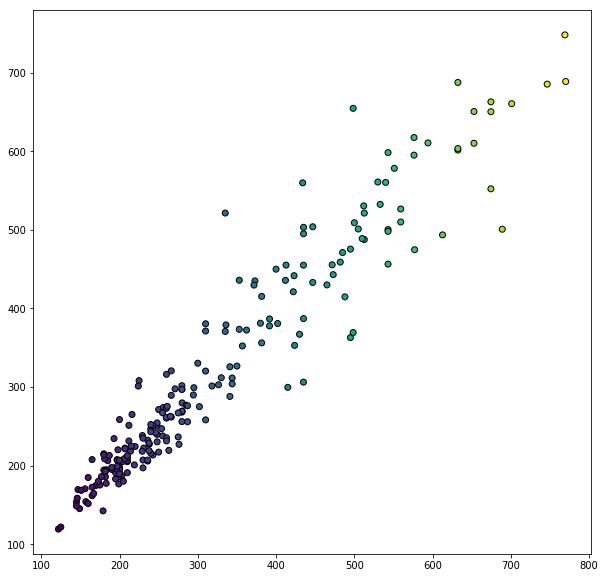

In [29]:
y_predict_test = grid_search.predict(x_test)

plt.subplots(figsize=(10,10))
plt.scatter(y_test, y_predict_test, marker='o', c=y_test, edgecolors='black', cmap='viridis')
# plt.colorbar()
plt.show()

In [30]:
valid_scr, valid_r2, valid_mae, valid_mse, valid_corr  = print_and_return_score(x_valid, y_valid, grid_search)

Score:  0.95
R^2:  0.95
MAE:  17.7
MSE:  906.38
Correlation  0.98


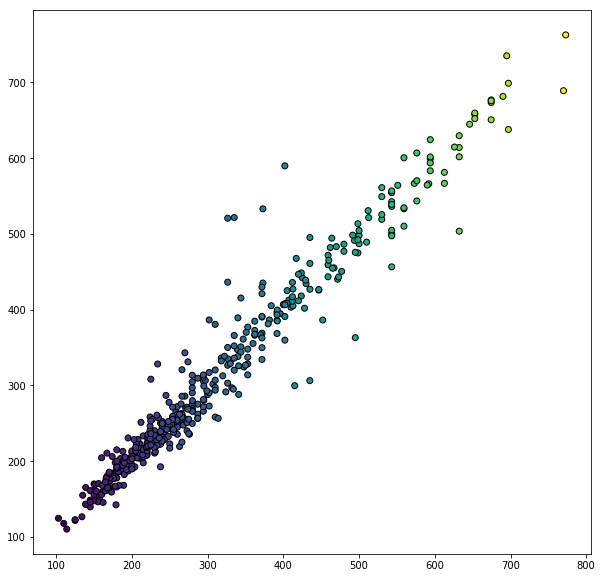

In [31]:
y_predict_valid = grid_search.predict(x_valid)

plt.subplots(figsize=(10,10))
plt.scatter(y_valid, y_predict_valid, marker='o', c=y_valid, edgecolors='black', cmap='viridis')
plt.show()

In [33]:
filename = 'model_GB_corr_valid_'+ str(valid_corr) + '_valid_r2_' + str(valid_r2) + 'corr_test_' + str(test_corr) + '_test_r2_' + str(test_r2) + '_train_test_split_gridSearch.sav'
pickle.dump(grid_search, open(filename, 'wb'))

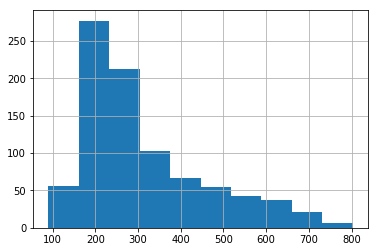

In [35]:
y_train['HV'].hist()

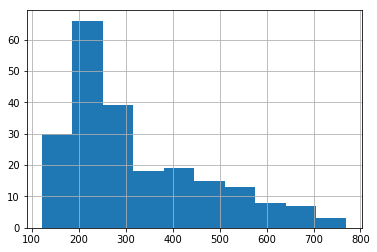

In [36]:
y_test['HV'].hist()

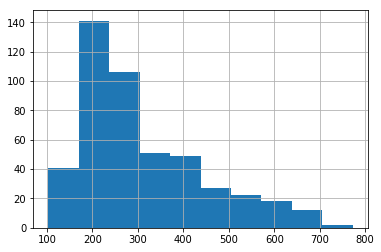

In [37]:
y_valid['HV'].hist()

In [38]:
kfold = model_selection.KFold(n_splits=5, shuffle=True)
scores = []
for train, test in kfold.split(x, y):
    x_train, y_train = x.iloc[train], y.iloc[train]
    x_test, y_test = x.iloc[test], y.iloc[test]
    rfr = grid_search.best_estimator_
    rfr.fit(x_train, y_train)

    scores.append(print_and_return_score(x_test, y_test, rfr))

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Score:  0.93
R^2:  0.93
MAE:  25.3
MSE:  1390.96
Correlation  0.96


C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Score:  0.91
R^2:  0.91
MAE:  28.21
MSE:  1809.32
Correlation  0.95
Score: 

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


 0.89
R^2:  0.89
MAE:  29.13
MSE:  2437.12
Correlation  0.95


C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Score:  0.93
R^2:  0.93
MAE:  27.95
MSE:  1578.79
Correlation  0.96


C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Score:  0.92
R^2:  0.92
MAE:  25.44
MSE:  1663.21
Correlation  0.96


In [39]:
listScore = []
for i in range(5):
    tmp = []
    for j in range(5):
        tmp.append(scores[j][i])
    listScore.append(round(np.mean(tmp), 2))
    print(round(np.mean(tmp), 2))

0.92
0.92
27.21
1775.88
0.96


In [40]:
valid_scr, valid_r2, valid_mae, valid_mse, valid_corr = print_and_return_score(x_valid, y_valid, rfr)

Score:  0.92
R^2:  0.92
MAE:  24.95
MSE:  1489.3
Correlation  0.96


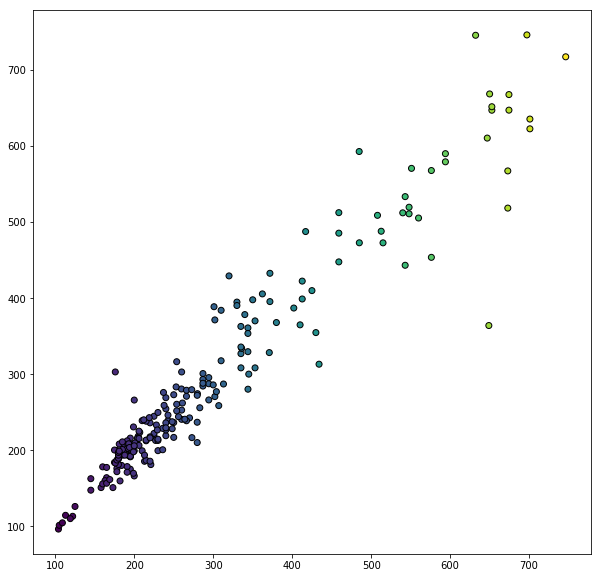

In [41]:
y_predict_test = rfr.predict(x_test)

plt.subplots(figsize=(10,10))
plt.scatter(y_test, y_predict_test, marker='o', c=y_test, edgecolors='black', cmap='viridis')
plt.show()

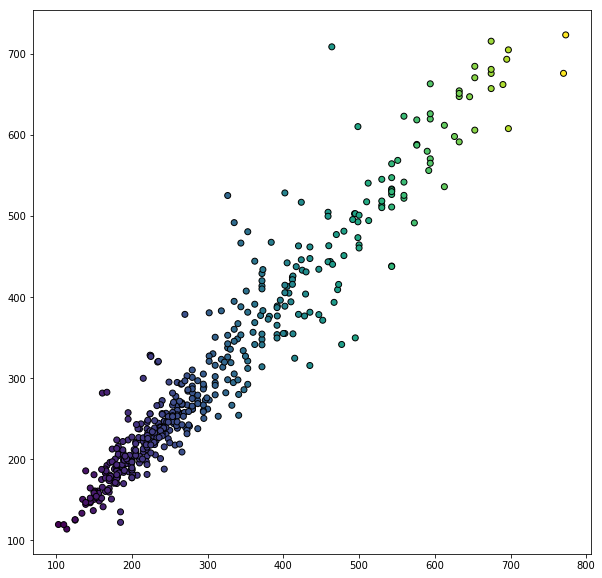

In [42]:
y_predict_valid = rfr.predict(x_valid)

plt.subplots(figsize=(10,10))
plt.scatter(y_valid, y_predict_valid, marker='o', c=y_valid, edgecolors='black', cmap='viridis')
plt.show()

In [43]:
filename = 'model_GB_corr_valid_'+ str(valid_corr) + '_valid_r2_' + str(valid_r2) + 'corr_test_' + str(listScore[4]) + '_test_r2_' + str(listScore[1]) + '_K_fold_GridSearch.sav'
pickle.dump(rfr, open(filename, 'wb'))

## Loaded model 

In [45]:
loaded_model = pickle.load(open('model_GB_corr_valid_0.9608416439208984_valid_r2_0.9222564258908558corr_test_0.96_test_r2_0.92_K_fold_GridSearch.sav', 'rb'))

In [46]:
ls_train_col = ['С', 'Mn', 'Si', 'S', 'P', 'Cr', 'Ni', 'Cu', 'Mo', 'V', 'Nb', 'Ti', 'Al', 'N', 'O', 'B', 'Сэкв','параметр закалки','V800-500 °C/c']
targets = ['HV']

x_input = df[ls_train_col]
y_input = df[targets]

x, x_valid, y, y_valid = train_test_split(x_input, y_input, test_size=0.3)
x_train,  x_test,  y_train,  y_test  =  train_test_split (x, y, test_size=0.3)

In [47]:
result = loaded_model.score(x_test, y_test)
print(result)

0.9630672014585623


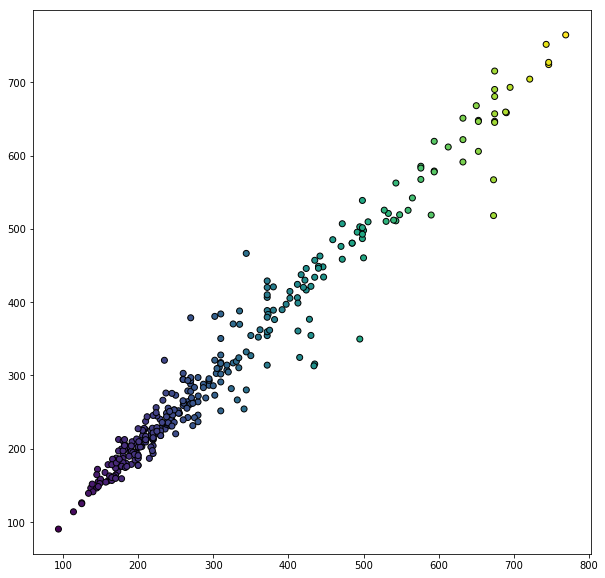

In [48]:
y_predict_test = loaded_model.predict(x_test)
plt.subplots(figsize=(10,10))
plt.scatter(y_test, y_predict_test, marker='o', c=y_test, edgecolors='black', cmap='viridis')
plt.show()

In [49]:
result = loaded_model.score(x_valid, y_valid)
print(result)

0.9691785815436317


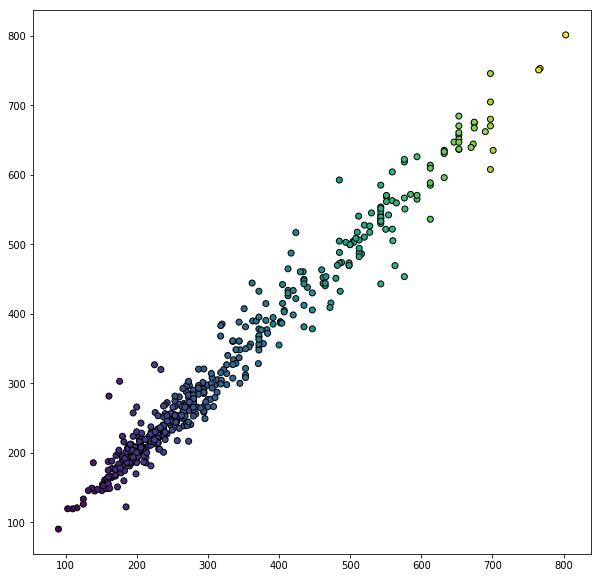

In [50]:
y_predict_valid = loaded_model.predict(x_valid)
plt.subplots(figsize=(10,10))
plt.scatter(y_valid, y_predict_valid, marker='o', c=y_valid, edgecolors='black', cmap='viridis')
plt.show()